# Текстовое описание набора данных
В качестве набора данных будем использовать набор данных, содержащий информацию о вине.

Эти данные являются результатами химического анализа вин, выращенных в одном регионе Италии, но полученных из трех различных сортов. В результате анализа было определено количество 13 компонентов, содержащихся в каждом из трех видов вин.

Файл содержит следующие колонки:

1) Alcohol  
2) Malic acid  
3) Ash  
4) Alcalinity of ash  
5) Magnesium  
6) Total phenols  
7) Flavanoids  
8) Nonflavanoid phenols  
9) Proanthocyanins  
10) Color intensity  
11) Hue  
12) OD280/OD315 of diluted wines  
13) Proline  

Класс записан в первом столбце (три варианта), признаки — в столбцах со второго по последний.

# Импорт библиотек

In [9]:
# Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных

In [10]:
data = pd.read_csv('data/wine.csv', sep=",")

# Основные характеристики датасета

In [12]:
# Первые 5 строк датасета
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
# Строки, колонки - количество
data.shape

(178, 14)

In [16]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 178


In [18]:
# Список колонок
data.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [20]:
# Список колонок с типами данных
data.dtypes

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

In [21]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Wine - 0
Alcohol - 0
Malic.acid - 0
Ash - 0
Acl - 0
Mg - 0
Phenols - 0
Flavanoids - 0
Nonflavanoid.phenols - 0
Proanth - 0
Color.int - 0
Hue - 0
OD - 0
Proline - 0


In [23]:
# Основные статистические характеристки набора данных
data.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [40]:
# Определим уникальные значения для целевого признака
data['Proline'].unique()

array([1065, 1050, 1185, 1480,  735, 1450, 1290, 1295, 1045, 1510, 1280,
       1320, 1150, 1547, 1310, 1130, 1680,  845,  780,  770, 1035, 1015,
        830, 1195, 1285,  915, 1515,  990, 1235, 1095,  920,  880, 1105,
       1020,  760,  795,  680,  885, 1080,  985, 1060, 1260, 1265, 1190,
       1375, 1120,  970, 1270,  520,  450,  630,  420,  355,  678,  502,
        510,  750,  718,  870,  410,  472,  886,  428,  392,  500,  463,
        278,  714,  515,  495,  562,  625,  480,  290,  345,  937,  660,
        406,  710,  438,  415,  672,  315,  488,  312,  325,  607,  434,
        385,  407,  372,  564,  465,  365,  380,  378,  352,  466,  342,
        580,  530,  560,  600,  650,  695,  720,  590,  550,  855,  425,
        675,  640,  725,  620,  570,  615,  685,  470,  740,  835,  840],
      dtype=int64)

# Визуальное исследование датасета

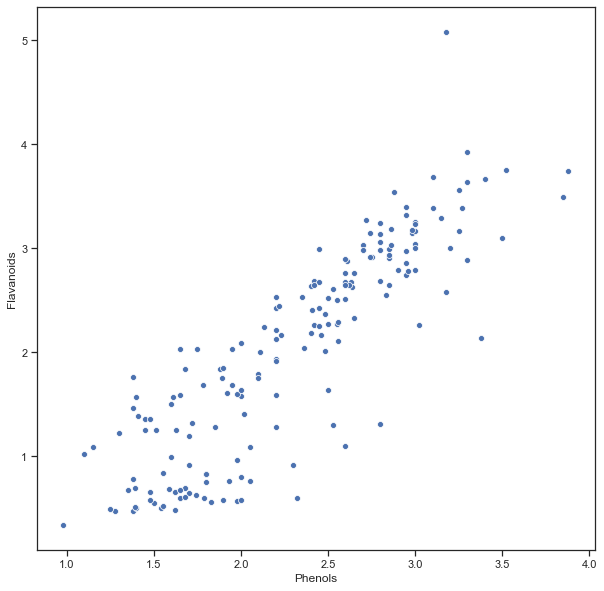

In [39]:
# Диаграмма рассеяния
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Phenols', y='Flavanoids', data=data)

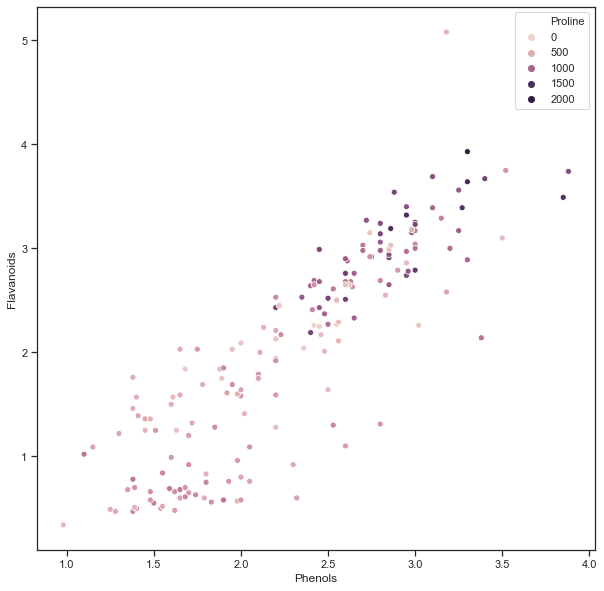

In [41]:
# Диаграмма рассеяния с учетом целевого признака
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Phenols', y='Flavanoids', data=data, hue='Proline')

# Гистограмма

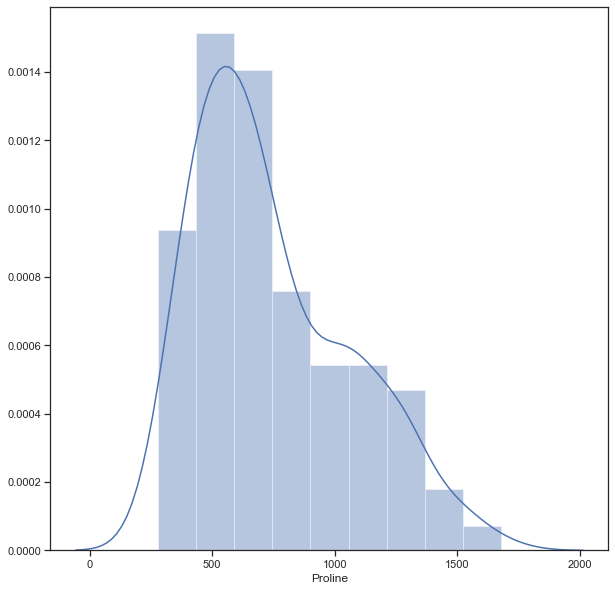

In [43]:
# Плотность вероятности распределения данных
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Proline'])

## Joinplot

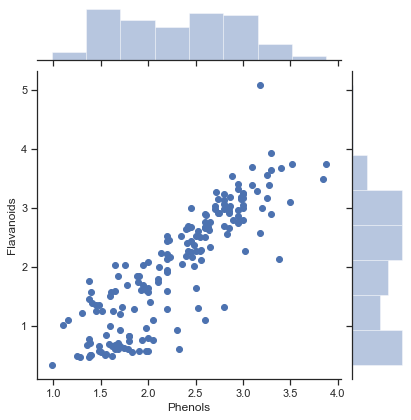

In [45]:
# Комбинация гистограмм и диаграмм рассеивания
sns.jointplot(x='Phenols', y='Flavanoids', data=data)

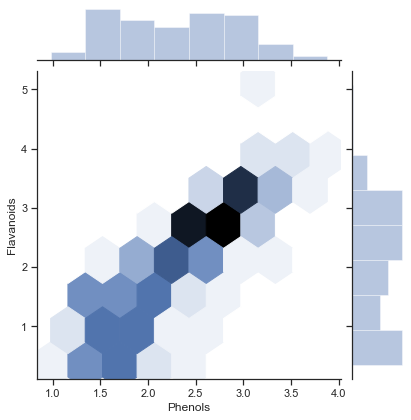

In [46]:
sns.jointplot(x='Phenols', y='Flavanoids', data=data, kind="hex")

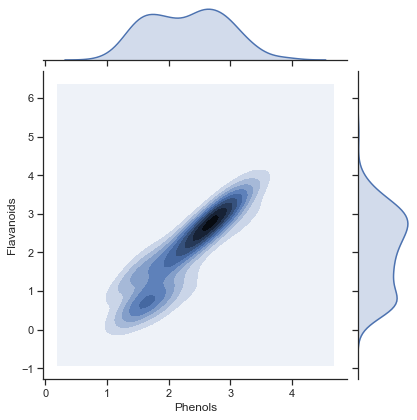

In [47]:
sns.jointplot(x='Phenols', y='Flavanoids', data=data, kind="kde")

## Парные диаграммы

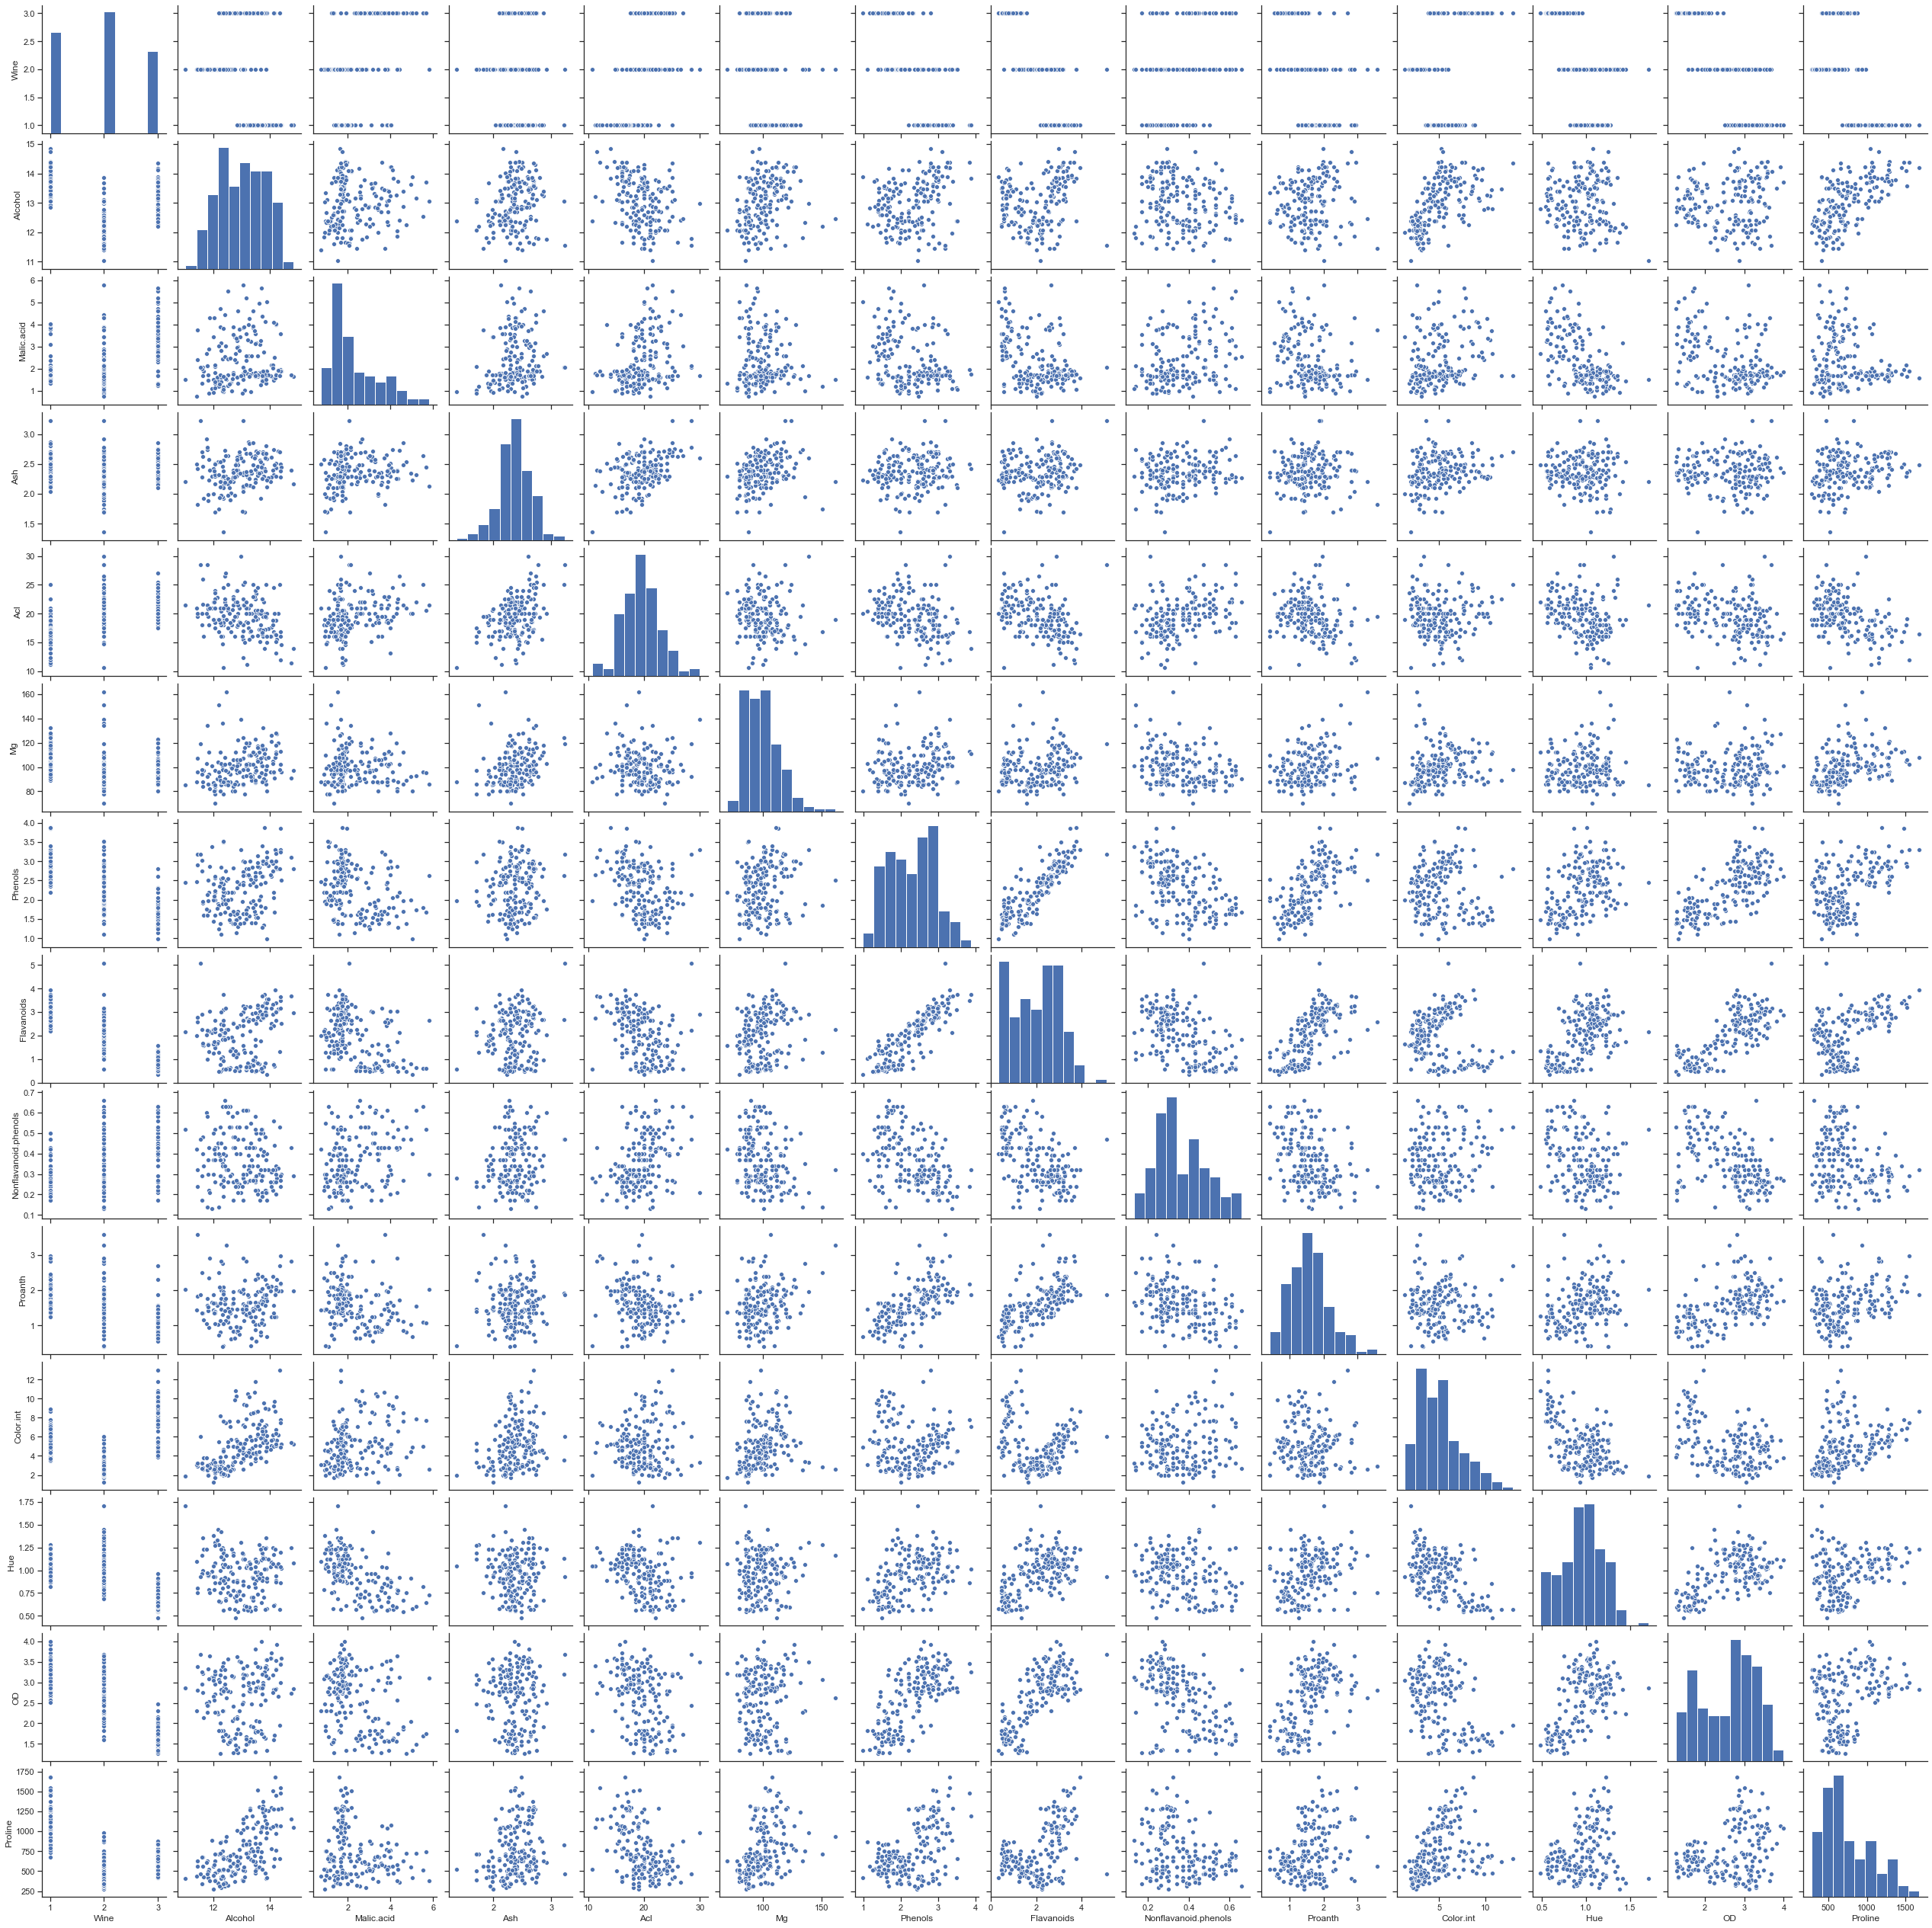

In [49]:
# Комбинация гистограмм и диаграмм рассеивания для всего набора данных
sns.pairplot(data)

## Ящик с усами  
  Отображает одномерное распределение вероятности.

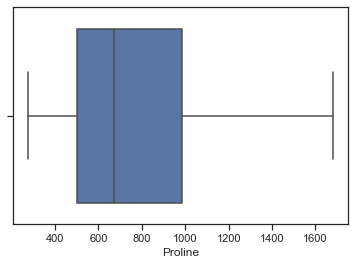

In [51]:
# Одномерное распределение вероятности
sns.boxplot(x=data['Proline'])

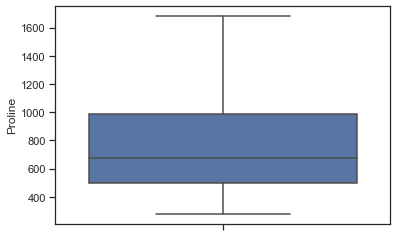

In [54]:
# По вертикали
sns.boxplot(y=data['Proline'])

## Violin plot

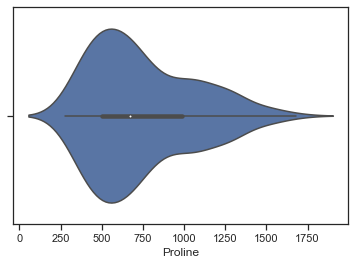

In [56]:
# По краям отображаются распределения плотности
sns.violinplot(x=data['Proline'])

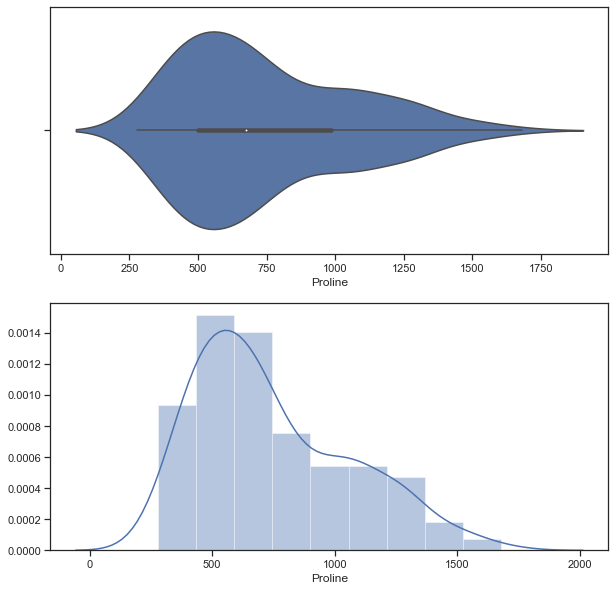

In [57]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Proline'])
sns.distplot(data['Proline'], ax=ax[1])

## Информация о корреляции признаков

In [58]:
# Корреляционная матрица
data.corr()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic.acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid.phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [60]:
data.corr(method='kendall')

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,1.000000,-0.238984,0.247494,-0.038085,0.449402,-0.184992,-0.590404,-0.725255,0.379234,-0.450225,0.065124,-0.479229,-0.607572,-0.406260
Alcohol,-0.238984,1.000000,0.093844,0.170154,-0.212978,0.250506,0.209099,0.191087,-0.109554,0.133526,0.434353,-0.021717,0.061513,0.449387
Malic.acid,0.247494,0.093844,1.000000,0.158178,0.210119,0.050869,-0.174929,-0.211918,0.175129,-0.168714,0.195607,-0.388707,-0.162909,-0.044660
Ash,-0.038085,0.170154,0.158178,1.000000,0.258352,0.254246,0.089855,0.049474,0.098937,0.018240,0.187786,-0.037234,-0.006341,0.171574
Acl,0.449402,-0.212978,0.210119,0.258352,1.000000,-0.121005,-0.256669,-0.309865,0.278091,-0.171404,-0.057281,-0.239210,-0.226253,-0.313218
Mg,-0.184992,0.250506,0.050869,0.254246,-0.121005,1.000000,0.172195,0.161603,-0.158361,0.117871,0.241781,0.023760,0.034307,0.343016
Phenols,-0.590404,0.209099,-0.174929,0.089855,-0.256669,0.172195,1.000000,0.701999,-0.310443,0.466517,0.028264,0.289210,0.478267,0.280203
Flavanoids,-0.725255,0.191087,-0.211918,0.049474,-0.309865,0.161603,0.701999,1.000000,-0.378099,0.534615,0.028674,0.354372,0.520448,0.263661
Nonflavanoid.phenols,0.379234,-0.109554,0.175129,0.098937,0.278091,-0.158361,-0.310443,-0.378099,1.000000,-0.269189,0.036065,-0.179755,-0.363787,-0.174108
Proanth,-0.450225,0.133526,-0.168714,0.018240,-0.171404,0.117871,0.466517,0.534615,-0.269189,1.000000,-0.014962,0.231071,0.369104,0.204172


На основе корреляционной матрицы можно сделать следующие выводы:
- Целевой признак Proline наиболее сильно коррелирует с Alcohol (0.449) и Wine (0.406). Эти признаки следует оставить в модели.
- Целевой признак отчасти коррелирует с Mg (0.343), Acl (0.313) и Color.int (0.316). Эти признаки стоит также оставить в модели.
- Целевой признак слабо коррелирует с Malic.Acid (0.044), Hue (0.143), OD (0.151) и Ash (0.171). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.

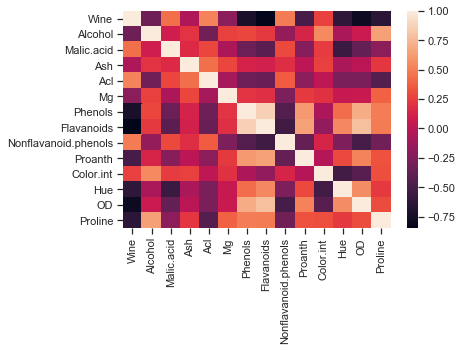

In [62]:
# Тепловая карта
sns.heatmap(data.corr())

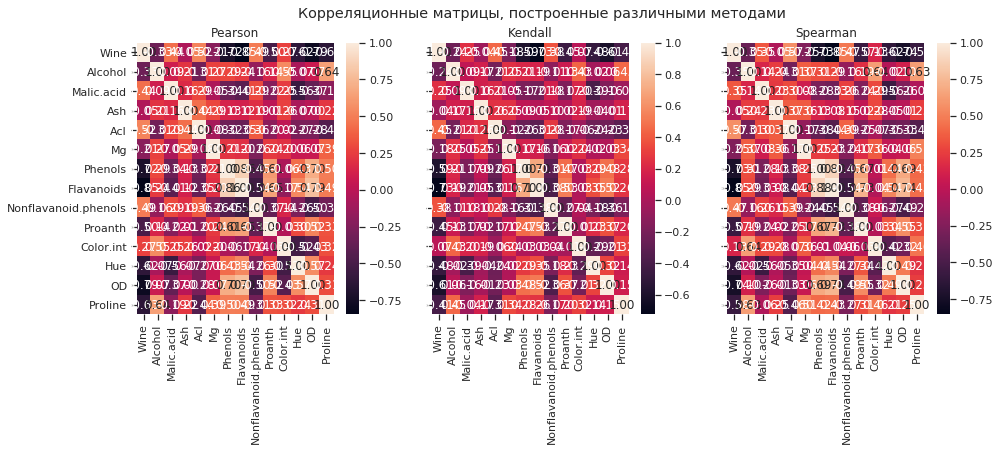

In [0]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')